In [1]:
# import nedded libraries
import pandas as pd
import numpy as np
#Data visualisation libraries 
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
# data describtion
df = pd.read_csv(r'C:\Users\Amr.Abdelfattah\machine-learning-course\ALT1088.csv')
#df.drop(0, axis=0, inplace=True)
display(df.head())
display(df.info())
display(df.describe())
display(df.columns)

,wellName,datasetName,TDEP,AT10,AT20,AT30,AT60,AT90,DTCO_Spline,DTSH_FAST,...,PHIT_QEPP,PIGE_QEPP,RHOZ,RXOZ,SLOANI,SUWI_QEPP,TIMANI,TNPH,VCL_GEO_QEPP,VPVS
0,ALTAMIRA-1088,Triple-Combo-DLIS,339.0392,1950.000,0.707154,1950.0,10.832100,7.135964,98.23854,-9999.0,...,0.000100,0.0001,4.013403,0.050991,-9999.0,1.0,-9999.0,-9999.000000,0.000000,-9999.0
1,ALTAMIRA-1088,Triple-Combo-DLIS,339.0900,1950.000,0.704731,1950.0,8.505132,5.887429,98.30256,-9999.0,...,0.064524,0.0001,4.001640,0.050295,-9999.0,1.0,-9999.0,0.290066,0.572353,-9999.0
2,ALTAMIRA-1088,Triple-Combo-DLIS,339.1408,1950.000,0.699605,1950.0,7.731413,5.455960,98.08208,-9999.0,...,0.064523,0.0001,3.992368,0.048923,-9999.0,1.0,-9999.0,0.297432,0.572354,-9999.0
3,ALTAMIRA-1088,Triple-Combo-DLIS,339.1916,1612.678,0.693298,1950.0,7.327123,5.284747,97.86161,-9999.0,...,0.064522,0.0001,3.983355,0.047157,-9999.0,1.0,-9999.0,0.304798,0.572356,-9999.0
4,ALTAMIRA-1088,Triple-Combo-DLIS,339.2424,1102.996,0.685811,1950.0,7.292263,5.350381,97.64114,-9999.0,...,0.064520,0.0001,3.975599,0.046190,-9999.0,1.0,-9999.0,0.312164,0.572357,-9999.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5449 entries, 0 to 5448
Data columns (total 29 columns):
wellName           5449 non-null object
datasetName        5449 non-null object
TDEP               5449 non-null float64
AT10               5449 non-null float64
AT20               5449 non-null float64
AT30               5449 non-null float64
AT60               5449 non-null float64
AT90               5449 non-null float64
DTCO_Spline        5449 non-null float64
DTSH_FAST          5449 non-null float64
DTSH_SLOW          5449 non-null float64
DTST_STM           5449 non-null float64
FractureDensity    5449 non-null float64
FWID_DF            5449 non-null float64
GR_EDTC            5449 non-null float64
HCGR               5449 non-null float64
MAXXENE_OVERALL    5449 non-null float64
MINXENE_OVERALL    5449 non-null float64
PEFZ               5449 non-null float64
PHIT_QEPP          5449 non-null float64
PIGE_QEPP          5449 non-null float64
RHOZ               5449 non-null f

None

,TDEP,AT10,AT20,AT30,AT60,AT90,DTCO_Spline,DTSH_FAST,DTSH_SLOW,DTST_STM,...,PHIT_QEPP,PIGE_QEPP,RHOZ,RXOZ,SLOANI,SUWI_QEPP,TIMANI,TNPH,VCL_GEO_QEPP,VPVS
count,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,...,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000
mean,477.418400,7.209140,5.464250,11.747523,5.850205,5.758121,83.468462,-278.553796,-277.604200,-155.925307,...,0.156141,0.135785,-58.131926,6.865778,-439.923120,0.589656,-1265.999892,-1.646133,0.181994,-388.960063
std,79.915265,53.731232,3.367189,105.551896,3.772537,3.627141,136.850477,2086.957083,2087.178503,2000.074699,...,0.037916,0.038118,776.035903,5.186951,2052.033229,0.198626,3325.600018,135.458543,0.112924,1938.451923
min,339.039200,0.553373,0.560712,0.552490,0.559762,0.566931,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,0.000100,0.000100,-9999.000000,0.038866,-9999.000000,0.029488,-9999.000000,-9999.000000,0.000000,-9999.000000
25%,408.228800,3.094698,3.246951,3.318285,3.434872,3.422878,79.725060,142.247800,142.545200,235.727500,...,0.136082,0.114467,2.387356,3.698005,-0.680135,0.442725,0.038825,0.158000,0.098349,1.795488
50%,477.418400,4.355697,4.492652,4.562423,4.718992,4.659128,83.112900,155.017500,155.447700,242.149300,...,0.158397,0.137214,2.422236,5.258507,0.199839,0.563721,0.095385,0.187865,0.149465,1.889249
75%,546.608000,6.745801,6.852986,7.105560,7.275657,7.122753,89.211090,184.352600,185.086200,255.390300,...,0.177638,0.158241,2.464753,8.450067,1.331142,0.715345,0.222279,0.218009,0.248860,2.012546
max,615.797600,1950.000000,28.982670,1950.000000,48.350190,43.501220,111.791500,324.325300,330.348700,354.157800,...,0.391846,0.370602,4.538782,60.936760,10.413000,1.000000,2.676318,0.550763,0.758516,3.495008


Index(['wellName', 'datasetName', 'TDEP', 'AT10', 'AT20', 'AT30', 'AT60',
       'AT90', 'DTCO_Spline', 'DTSH_FAST', 'DTSH_SLOW', 'DTST_STM',
       'FractureDensity', 'FWID_DF', 'GR_EDTC', 'HCGR', 'MAXXENE_OVERALL',
       'MINXENE_OVERALL', 'PEFZ', 'PHIT_QEPP', 'PIGE_QEPP', 'RHOZ', 'RXOZ',
       'SLOANI', 'SUWI_QEPP', 'TIMANI', 'TNPH', 'VCL_GEO_QEPP', 'VPVS'],
      dtype='object')

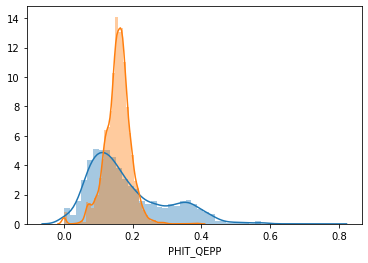

In [3]:
sns.distplot(df['VCL_GEO_QEPP'])
sns.distplot(df['PHIT_QEPP'])


wellName             0
datasetName          0
TDEP                 0
AT10                 0
AT20                 0
AT30                 0
AT60                 0
AT90                 0
DTCO_Spline          1
DTSH_FAST          240
DTSH_SLOW          240
DTST_STM           216
FractureDensity    423
FWID_DF            216
GR_EDTC              1
HCGR                 1
MAXXENE_OVERALL    231
MINXENE_OVERALL    231
PEFZ                33
PHIT_QEPP            0
PIGE_QEPP            0
RHOZ                33
RXOZ                 0
SLOANI             240
SUWI_QEPP            0
TIMANI             690
TNPH                 1
VCL_GEO_QEPP         0
VPVS               213
dtype: int64

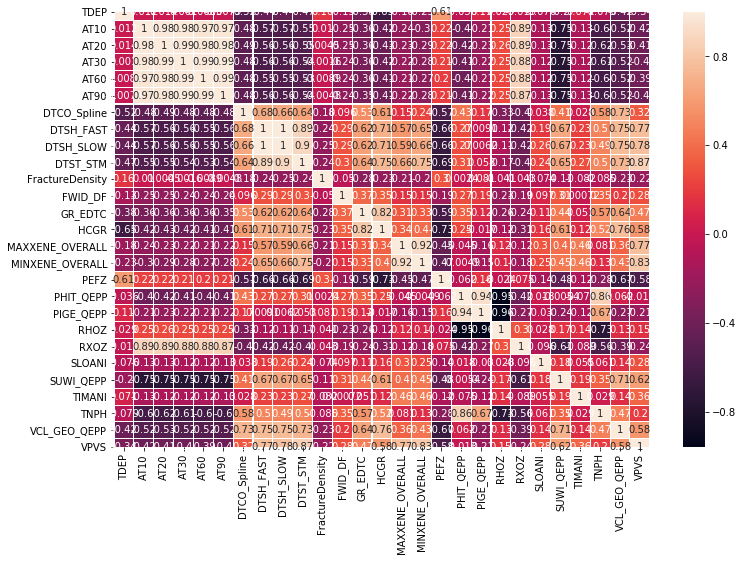

In [4]:
df.replace(-9999.000000, np.nan, inplace=True)
display(df.isna().sum())
df.dropna(inplace=True)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,ax=ax,linewidths=0.1)

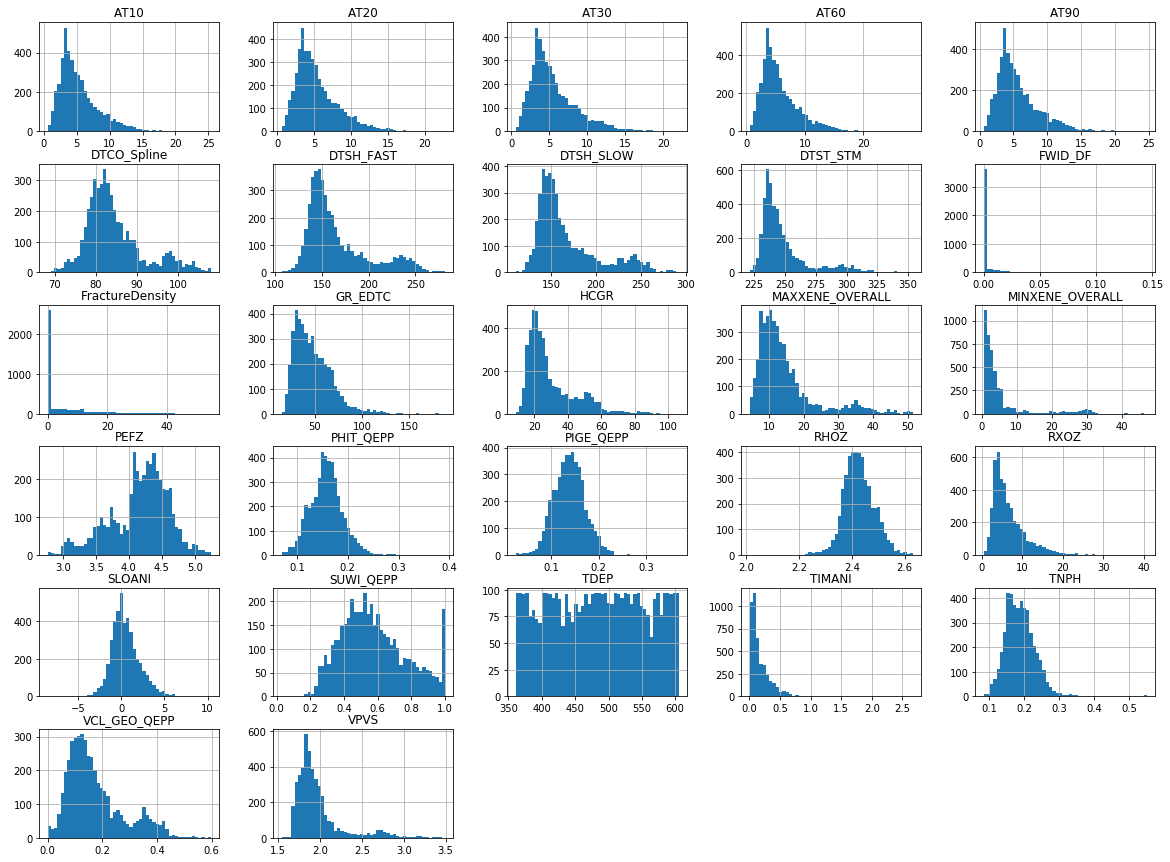

In [7]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
df_new = df.drop(columns = ['wellName', 'datasetName', 'RXOZ','TDEP','SLOANI', 'HCGR', 'DTSH_SLOW', 'DTSH_FAST',
                            'FWID_DF','AT60', 'AT90','PEFZ','PIGE_QEPP','MINXENE_OVERALL', 'GR_EDTC','DTST_STM'],axis=1)
df_new

,AT10,AT20,AT30,DTCO_Spline,FractureDensity,MAXXENE_OVERALL,PHIT_QEPP,RHOZ,SUWI_QEPP,TIMANI,TNPH,VCL_GEO_QEPP,VPVS
423,1.892762,1.937713,1.928971,98.82664,0.0,5.891086,0.180918,2.397372,0.942779,0.084155,0.263728,0.402078,2.057280
424,1.942294,1.996271,2.002669,98.66711,0.0,5.950537,0.177937,2.405003,0.934120,0.078935,0.264733,0.414315,2.064822
425,2.162266,2.208972,2.228574,98.57436,0.0,6.008509,0.174401,2.413163,0.878653,0.077981,0.259161,0.411406,2.063830
426,2.377376,2.433882,2.468744,98.48160,0.0,6.066481,0.172062,2.418204,0.819470,0.077027,0.253588,0.404173,2.062838
427,2.581552,2.671001,2.723179,98.38885,0.0,6.124452,0.170288,2.421768,0.761881,0.076074,0.248016,0.394894,2.061846
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5250,6.794074,7.377211,7.361688,74.87739,0.0,15.399160,0.104418,2.518093,0.600260,0.198172,0.114744,0.090820,1.998460
5251,5.947809,6.647367,6.768545,74.87739,0.0,15.881200,0.103983,2.520106,0.641151,0.154258,0.118397,0.101640,1.995074
5252,5.679838,6.270150,6.342090,74.87739,0.0,16.130630,0.104508,2.519605,0.668371,0.147932,0.119593,0.101549,1.993799
5253,5.650460,6.234017,6.271030,74.87739,0.0,16.380050,0.103984,2.520535,0.678982,0.141606,0.120789,0.107946,1.992525


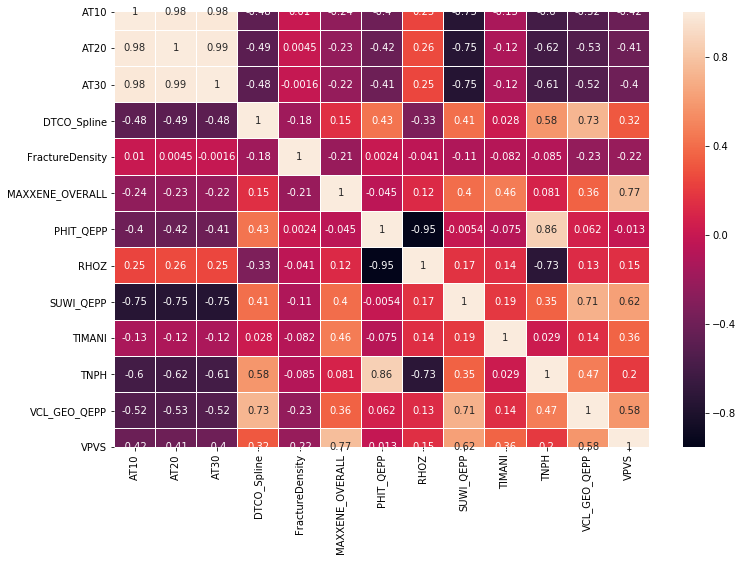

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_new.corr(),annot=True,ax=ax,linewidths=0.1)

In [10]:
df_new.replace(-9999.000000, np.nan, inplace=True)
display(df_new.isna().sum())
df_new.dropna(inplace=True)
df_new

AT10               0
AT20               0
AT30               0
DTCO_Spline        0
FractureDensity    0
MAXXENE_OVERALL    0
PHIT_QEPP          0
RHOZ               0
SUWI_QEPP          0
TIMANI             0
TNPH               0
VCL_GEO_QEPP       0
VPVS               0
dtype: int64

,AT10,AT20,AT30,DTCO_Spline,FractureDensity,MAXXENE_OVERALL,PHIT_QEPP,RHOZ,SUWI_QEPP,TIMANI,TNPH,VCL_GEO_QEPP,VPVS
423,1.892762,1.937713,1.928971,98.82664,0.0,5.891086,0.180918,2.397372,0.942779,0.084155,0.263728,0.402078,2.057280
424,1.942294,1.996271,2.002669,98.66711,0.0,5.950537,0.177937,2.405003,0.934120,0.078935,0.264733,0.414315,2.064822
425,2.162266,2.208972,2.228574,98.57436,0.0,6.008509,0.174401,2.413163,0.878653,0.077981,0.259161,0.411406,2.063830
426,2.377376,2.433882,2.468744,98.48160,0.0,6.066481,0.172062,2.418204,0.819470,0.077027,0.253588,0.404173,2.062838
427,2.581552,2.671001,2.723179,98.38885,0.0,6.124452,0.170288,2.421768,0.761881,0.076074,0.248016,0.394894,2.061846
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5250,6.794074,7.377211,7.361688,74.87739,0.0,15.399160,0.104418,2.518093,0.600260,0.198172,0.114744,0.090820,1.998460
5251,5.947809,6.647367,6.768545,74.87739,0.0,15.881200,0.103983,2.520106,0.641151,0.154258,0.118397,0.101640,1.995074
5252,5.679838,6.270150,6.342090,74.87739,0.0,16.130630,0.104508,2.519605,0.668371,0.147932,0.119593,0.101549,1.993799
5253,5.650460,6.234017,6.271030,74.87739,0.0,16.380050,0.103984,2.520535,0.678982,0.141606,0.120789,0.107946,1.992525


In [17]:
# take log() feature helps solve skewness problem
import numpy as np
df_new=np.log(df_new)
# df_new.dropna(inplace=True)
df_new

,AT10,FractureDensity,RHOZ,TIMANI,TNPH,VCL_GEO_QEPP,VPVS


In [16]:
df_new = df_new.drop(columns = ['AT20','AT30','MAXXENE_OVERALL','SUWI_QEPP','PHIT_QEPP','DTCO_Spline'],axis=1)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_new.corr(),annot=True,ax=ax,linewidths=0.1)

KeyError: "['AT20' 'AT30' 'MAXXENE_OVERALL' 'SUWI_QEPP' 'PHIT_QEPP' 'DTCO_Spline'] not found in axis"

In [ ]:
# feature scaling and model training
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,train_test_split
min_max_scaler = preprocessing.MinMaxScaler()
X = df_new.loc[:,df_new.columns!='FractureDensity'] # features
Y = df_new['FractureDensity'] # label
X = min_max_scaler.fit_transform(X)
linear_reg = LinearRegression()
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)
linear_reg.fit(xtrain,ytrain)
preds=linear_reg.predict(xtest)
print('model rmse = ',np.mean((preds-ytest)**2))

In [ ]:
# test model with cross validation
# visualize rmse scores
import plotly.graph_objects as go
scores = cross_val_score(linear_reg, X , Y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = -scores
fig = go.Figure(
    data=[go.Bar(x=[i for i in range(10)],y=list(rmse_scores)[:10])],
    layout_title_text="cv versus model error")
fig.show()

In [ ]:
lm = LinearRegression()
train_sizes, train_scores, test_scores = learning_curve(estimator=lm,
                                                        X=xtrain,
                                                        y=ytrain,
                                                        scoring = 'neg_mean_squared_error',
                                                       cv=10)
lm.fit(xtrain,ytrain)

In [ ]:
predictions = lm.predict(xtest)
error=np.sqrt(mean_squared_error(ytest,predictions)) # rmse
print("RMSE : ",error)

In [ ]:
print("intercept : ",lm.intercept_)
for idx, col_name in enumerate(xtrain.columns):
    print("The coefficient for {} is {}".format(col_name, lm.coef_[idx]))

In [ ]:
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
# check model fitted lines against different features
plt.figure(figsize=(10,6))

plt.subplot(2, 2, 1)
plt.scatter(df_new['RHOZ'],df_new['FractureDensity'])
plt.plot(df_new['RHOZ'],'r')
plt.xlabel('RHOZ')
plt.ylabel('FractureDensity')

plt.subplot(2, 2, 2)
plt.scatter(df_new['AT10'],df_new['FractureDensity'])
plt.plot(df_new['AT10'],'r')
plt.xlabel('AT10')
plt.ylabel('FractureDensity')

plt.subplot(2, 2, 3)
plt.scatter(df_new['TIMANI'],df_new['FractureDensity'])
plt.plot(df_new['TIMANI'],'r')
plt.xlabel('TIMANI')
plt.ylabel('FractureDensity')

plt.show()